Introduction

Objective:

The objective of this project is to model and analyze forward rates in the financial markets using time series analysis techniques. Forward rates are interest rates applicable to a financial transaction that will take place in the future. These rates are significant indicators in the financial industry, often used for hedging and speculation.

Scope:

Data: The dataset consists of historical forward rates along with several economic indicators.

Techniques: The project primarily uses ARIMA (AutoRegressive Integrated Moving Average) for time series modeling.

Tools: Python libraries such as Pandas, Statsmodels, and Matplotlib are used for data manipulation, modeling, and visualization.

Goals:
Understand the trends and seasonality in forward rates.
Build a time series model that can forecast future rates.
Evaluate the performance of the model using various metrics and diagnostic tests.

In [17]:
file_path = 'D:\\2.1_codebase\\1_Datasets\\deviramanan2016-macroeconomic-analyses\\cleanedData.tsv'
# OR
# file_path = 'D:/2.1_codebase/1_Datasets/deviramanan2016-macroeconomic-analyses/cleanedData.tsv'

# Reload the TSV file into a DataFrame, specifying the tab separator
df_real = pd.read_csv(file_path, sep='\t')

# Show the first few rows of the DataFrame to verify it's loaded correctly
df_real.head()


,Security,Date,DateNum,Forward3m,Forward6m,Forward12m,Premium3m,Premium6m,Premium12m,EBIT Growth_time,...,Market Cap_all,EV/EBITDA_all,Div Yield_all,Interest Coverage_all,Rev Growth_all,Analyst Rating_all,ROIC_all,Fin Lvg_all,P/Book_all,P/FCF_all
0,EFX US Equity,1/1/04,2004.0,-0.054431,0.031241,0.140328,0.0,0.0,0.0,-0.102868,...,-0.064203,-0.060555,-0.299874,0.089936,-0.085800,-0.696932,0.750755,0.348350,0.916411,-0.101898
1,DRI US Equity,1/1/04,2004.0,-0.184027,-0.048973,0.189312,0.0,0.0,0.0,0.020752,...,-0.042708,-0.304009,-0.282561,0.087787,-0.044553,-0.674346,0.411299,-0.057846,0.125796,0.362381
2,KG US Equity,1/1/04,2004.0,-0.333062,-0.280647,-0.554818,0.0,0.0,0.0,-0.821274,...,-0.043587,NaN,-0.401308,0.155233,-0.628514,-0.038965,0.407038,-0.224915,-0.085170,0.081425
3,PHM US Equity,1/1/04,2004.0,-0.077199,0.114104,0.275995,0.0,0.0,0.0,0.520880,...,0.075801,-0.161918,-0.334503,-0.030188,0.716413,0.631770,0.323805,-0.047428,-0.125097,NaN
4,MAR US Equity,1/1/04,2004.0,0.159281,0.231482,0.523044,0.0,0.0,0.0,-0.839345,...,0.189323,0.435386,-0.144530,0.002404,-0.516697,-0.706211,-0.082808,-0.077901,0.007411,0.133671


In [18]:
# Check for missing values in each column
missing_values_count = df_real.isnull().sum()

# Display the columns with their respective counts of missing values
missing_values_count

Security                      0
Date                          0
DateNum                       0
Forward3m                  3951
Forward6m                  4298
Forward12m                 5210
Premium3m                     0
Premium6m                     0
Premium12m                    0
EBIT Growth_time           4084
Current Ratio_time         8629
Market Cap_time              31
EV/EBITDA_time             7732
Div Yield_time             1928
Interest Coverage_time    15015
Rev Growth_time              91
Analyst Rating_time         683
ROIC_time                   789
Fin Lvg_time               1159
P/Book_time                1032
P/FCF_time                 9756
EBIT Growth_all            4084
Current Ratio_all          8629
Market Cap_all               31
EV/EBITDA_all              7732
Div Yield_all              1928
Interest Coverage_all     15015
Rev Growth_all               91
Analyst Rating_all          683
ROIC_all                    789
Fin Lvg_all                1159
P/Book_a

In [19]:
df_real.head()

,Security,Date,DateNum,Forward3m,Forward6m,Forward12m,Premium3m,Premium6m,Premium12m,EBIT Growth_time,...,Market Cap_all,EV/EBITDA_all,Div Yield_all,Interest Coverage_all,Rev Growth_all,Analyst Rating_all,ROIC_all,Fin Lvg_all,P/Book_all,P/FCF_all
0,EFX US Equity,1/1/04,2004.0,-0.054431,0.031241,0.140328,0.0,0.0,0.0,-0.102868,...,-0.064203,-0.060555,-0.299874,0.089936,-0.085800,-0.696932,0.750755,0.348350,0.916411,-0.101898
1,DRI US Equity,1/1/04,2004.0,-0.184027,-0.048973,0.189312,0.0,0.0,0.0,0.020752,...,-0.042708,-0.304009,-0.282561,0.087787,-0.044553,-0.674346,0.411299,-0.057846,0.125796,0.362381
2,KG US Equity,1/1/04,2004.0,-0.333062,-0.280647,-0.554818,0.0,0.0,0.0,-0.821274,...,-0.043587,NaN,-0.401308,0.155233,-0.628514,-0.038965,0.407038,-0.224915,-0.085170,0.081425
3,PHM US Equity,1/1/04,2004.0,-0.077199,0.114104,0.275995,0.0,0.0,0.0,0.520880,...,0.075801,-0.161918,-0.334503,-0.030188,0.716413,0.631770,0.323805,-0.047428,-0.125097,NaN
4,MAR US Equity,1/1/04,2004.0,0.159281,0.231482,0.523044,0.0,0.0,0.0,-0.839345,...,0.189323,0.435386,-0.144530,0.002404,-0.516697,-0.706211,-0.082808,-0.077901,0.007411,0.133671


C:\Users\tharu\AppData\Local\Temp\ipykernel_27436\2131143851.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_real['Date'] = pd.to_datetime(df_real['Date'])
C:\Users\tharu\AppData\Local\Temp\ipykernel_27436\2131143851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.sort_index(inplace=True)


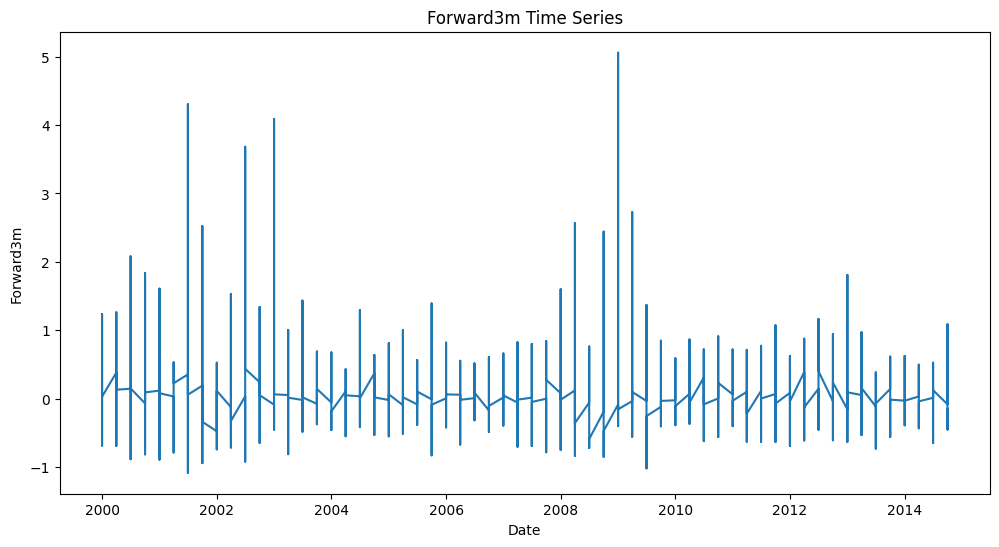

In [20]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Convert 'Date' column to datetime format
df_real['Date'] = pd.to_datetime(df_real['Date'])

# Drop rows where 'Forward3m' is missing
df_cleaned = df_real.dropna(subset=['Forward3m'])

# Set 'Date' as the index for time series analysis
df_cleaned.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date)
df_cleaned.sort_index(inplace=True)

# Plot the cleaned 'Forward3m' time series data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Forward3m'])
plt.title('Forward3m Time Series')
plt.xlabel('Date')
plt.ylabel('Forward3m')
plt.show()


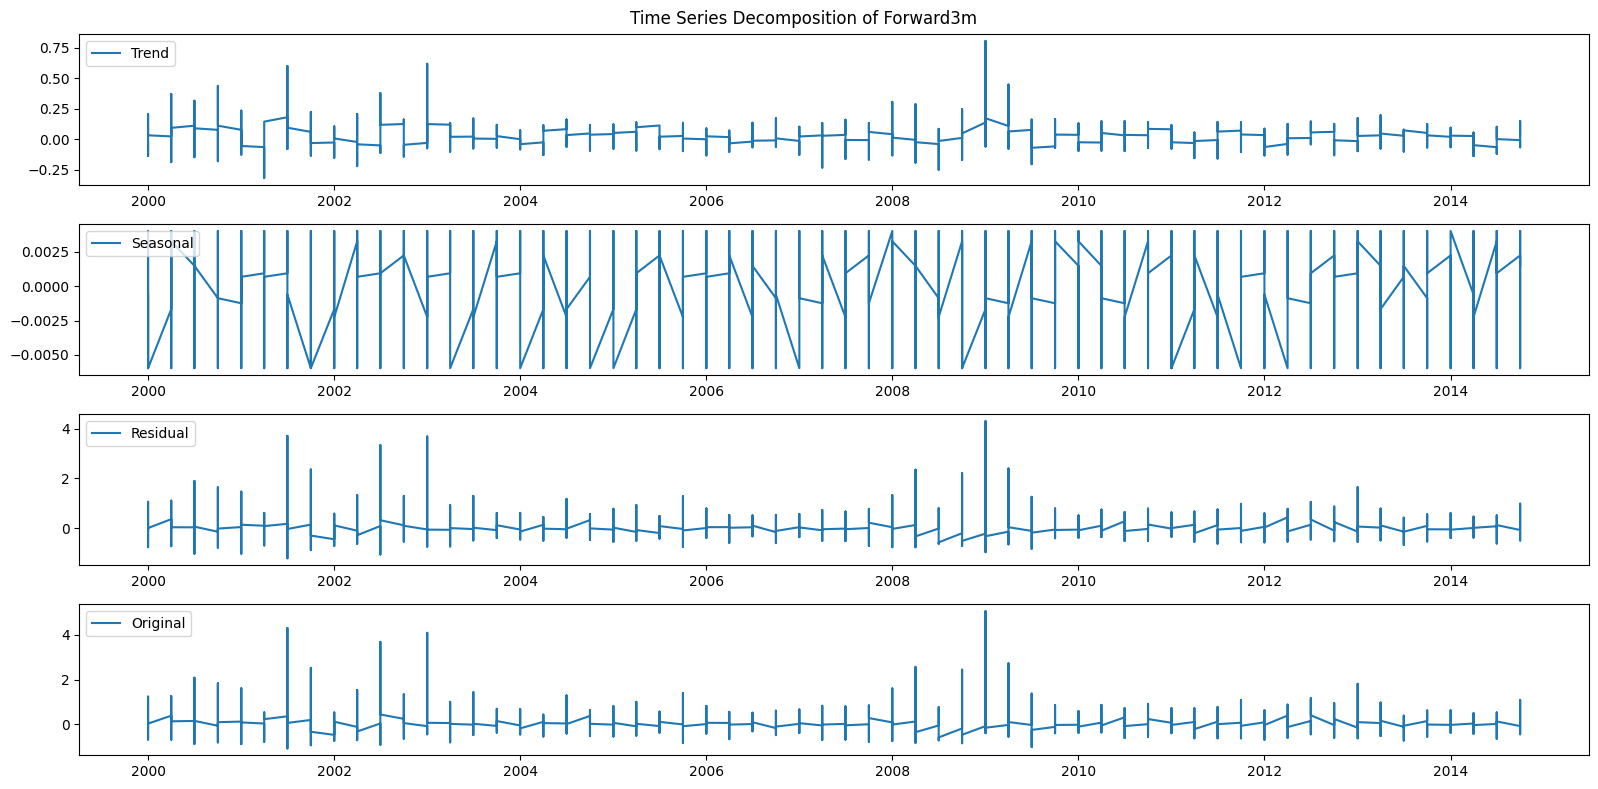

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'Forward3m' time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df_cleaned['Forward3m'], period=12)

# Plot the decomposed components
plt.figure(figsize=(16, 8))
plt.suptitle('Time Series Decomposition of Forward3m')

# Trend
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residual
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

# Original
plt.subplot(414)
plt.plot(df_cleaned['Forward3m'], label='Original')
plt.legend(loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on 'Forward3m' data
result = adfuller(df_cleaned['Forward3m'])

# Extract and display test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_statistic, p_value, critical_values


(-15.861343624690011,
 9.204265332754947e-29,
 {'1%': -3.430474426717326,
  '5%': -2.861594994112659,
  '10%': -2.5667992715370773})

The p-value is significantly below 0.05, and the ADF statistic is lower than the critical values, 
allowing us to reject the null hypothesis. 
This means your time series data is stationary, which is excellent news for our ARIMA modeling.

In [32]:
# Take a smaller, representative subset of the data for the ADF test
subset_data = df_cleaned['Forward3m'].iloc[:500]

# Perform Augmented Dickey-Fuller test on the subset data
result_subset = adfuller(subset_data)

# Extract and display test statistics for the subset data
adf_statistic_subset = result_subset[0]
p_value_subset = result_subset[1]
critical_values_subset = result_subset[4]

adf_statistic_subset, p_value_subset, critical_values_subset


(-22.403361368808117,
 0.0,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056})

Step 1: Parameter Selection for ARIMA
The parameters 
p, 
d, and 
q are crucial for the ARIMA model. Here's how we can identify suitable values for each:

Identify the order of differencing (
d): Since our time series is already stationary (based on the ADF test), 
d could be 0 or 1.

Identify the order of the AR term (
p): We can use the Partial Autocorrelation Function (PACF) plot for this. The PACF plot helps us understand the direct relationship between an observation and its lag.

Identify the order of the MA term (
q): The Autocorrelation Function (ACF) plot can be used to identify the value for 
q. The ACF plot helps us understand the correlation between an observation and its lagged values.

<Figure size 1200x400 with 0 Axes>

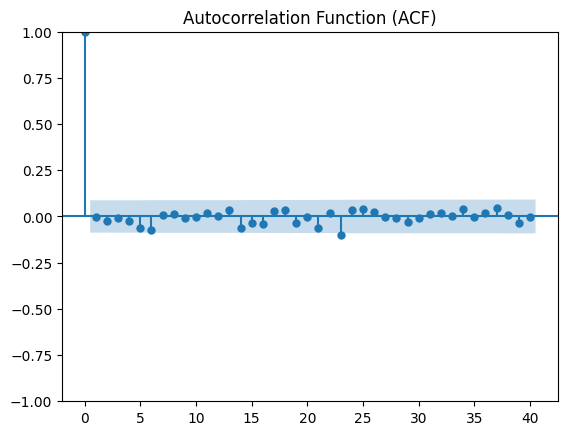

<Figure size 1200x400 with 0 Axes>

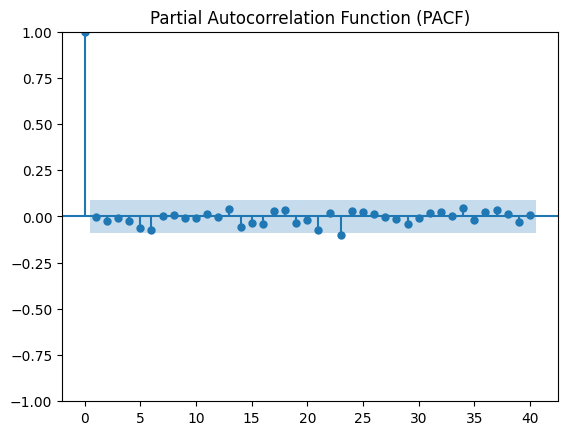

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation Function (ACF) to identify 'q'
plt.figure(figsize=(12, 4))
plot_acf(subset_data, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF) to identify 'p'
plt.figure(figsize=(12, 4))
plot_pacf(subset_data, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [34]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the parameter grid for p, d, and q
p_values = [2, 3]
d_values = [0, 1]
q_values = [2, 3]

# Create a list to store the results
results = []

# Loop through all combinations of p, d, and q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit the ARIMA model
        model = ARIMA(subset_data, order=(p, d, q))
        model_fit = model.fit()
        
        # Get the AIC value
        aic = model_fit.aic
        
        # Append the results to the list
        results.append((p, d, q, aic))
        
    except Exception as e:
        # Handle any errors that may occur
        print(f"An error occurred for ARIMA({p}, {d}, {q}): {e}")

# Sort the results by AIC and get the best combination
best_result = sorted(results, key=lambda x: x[3])[0]
best_result


C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

(2, 0, 2, -59.106652152283715)

C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

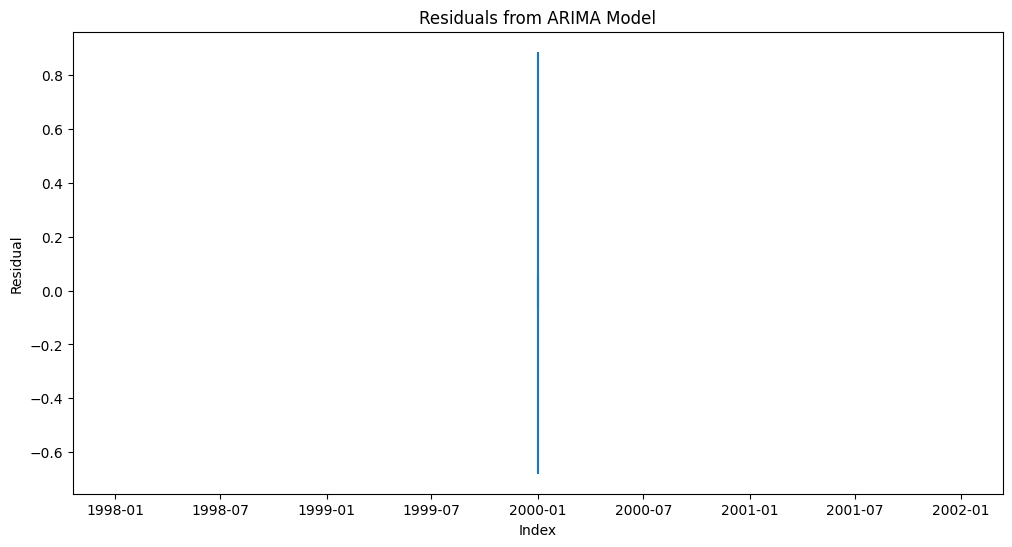

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Forward3m   No. Observations:                  500
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  35.553
Date:                Fri, 27 Oct 2023   AIC                            -59.107
Time:                        20:40:59   BIC                            -33.819
Sample:                             0   HQIC                           -49.184
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0197      0.007      2.766      0.006       0.006       0.034
ar.L1          0.0847      0.616      0.137      0.891      -1.123       1.293
ar.L2          0.7237      0.596      1.213      0.225      -0.445       1.893
ma.L1         -0.1040      0.599     -0.174      0.862      -1.278       1.070
ma.L2         -0.7638      0.591     -1.293      0.196      -1.922       0.394
sigma2         0.0508      0.003     18.191      0.000       0.045       0.056
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                15.22
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.18
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Fit the best ARIMA model based on the best parameters
best_p, best_d, best_q, _ = best_result  # Unpack the best result parameters
best_model = ARIMA(subset_data, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Plot the residuals to check for any patterns
residuals = pd.DataFrame(best_model_fit.resid)
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.show()

# Summary of the model to check various statistics
best_model_fit.summary()



ARIMA Model Summary
AIC and BIC: Your AIC is -59.107 and BIC is -33.819. Both are criteria for comparing the goodness of fit among different models. Lower values are better, and your model has a relatively low AIC.

Coefficients: These are the estimated parameters for the AR and MA terms. For instance, 
1
ar.L1 and 
2
ar.L2 are the coefficients for the AR terms, and 
1
ma.L1 and 
2
ma.L2 are the coefficients for the MA terms.

P>|z|: These are p-values for each coefficient. A lower p-value (< 0.05) suggests that the corresponding coefficient is significant. In your case, most p-values are above 0.05, indicating that the coefficients are not statistically significant. This could imply that the model might be simplified.

Ljung-Box Test: This is a test for the lack of fit. A low p-value (Prob(Q)) suggests that the residuals have a pattern, which is not desirable. Your Prob(Q) is 0.84, which is good.

Jarque-Bera Test: This is a test for the normality of the residuals. A low Prob(JB) suggests that the residuals are not normally distributed. Yours is 0.00, indicating that the residuals are not normal.

Heteroskedasticity (H): A test to check if the variance of the errors is constant across levels of the independent variable. The Prob(H) is 0.17, suggesting the errors are homoskedastic or have constant variance, which is good.

Residual Plot
You mentioned that this residual plot is a straight vertical line at 2000-01. This could indicate that the residuals aren't spread out randomly, which is generally what you want to see.

In summary, while this model has a low AIC and BIC, some other diagnostic metrics suggest there may be room for improvement.





C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


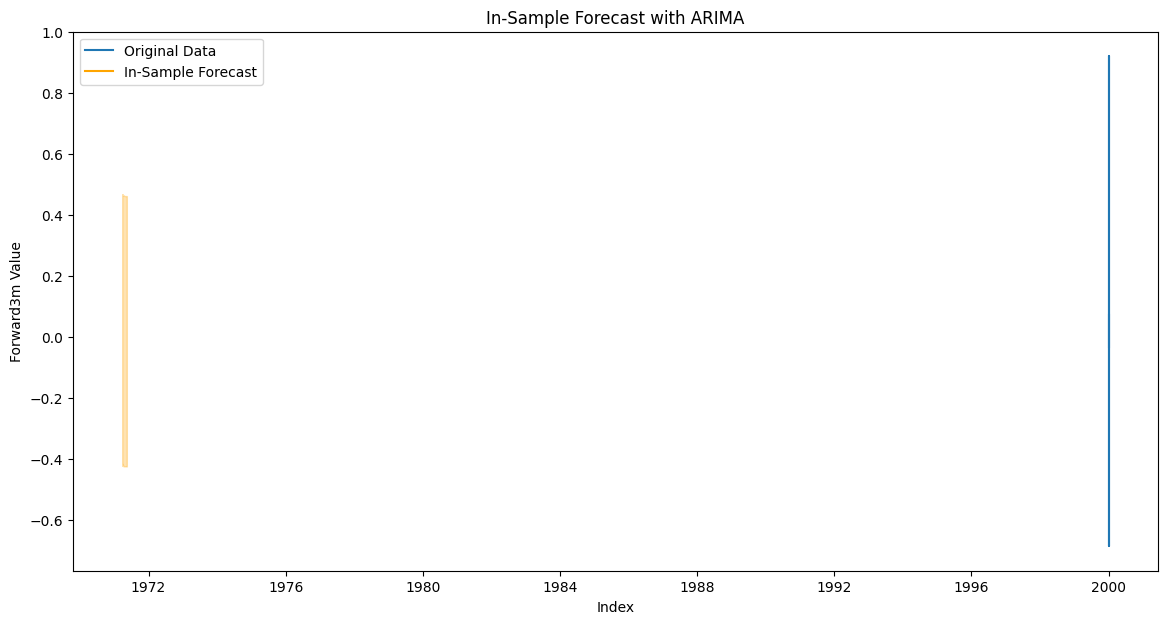

In [40]:
# Generate in-sample forecast
# Generate in-sample forecast
forecast_object = best_model_fit.get_forecast(steps=50)

# Extract forecast values, standard error, and confidence intervals
forecast_values = forecast_object.predicted_mean
stderr = forecast_object.se_mean
conf_int = forecast_object.conf_int()

# Create a DataFrame to hold the forecast values
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=range(len(subset_data)-50, len(subset_data)))

# Plot the original data and the forecasted values
plt.figure(figsize=(14, 7))
plt.plot(subset_data, label='Original Data')
plt.plot(forecast_df, label='In-Sample Forecast', color='orange')
plt.fill_between(forecast_df.index, conf_int.values[:, 0], conf_int.values[:, 1], color='orange', alpha=0.3)
plt.title('In-Sample Forecast with ARIMA')
plt.xlabel('Index')
plt.ylabel('Forward3m Value')
plt.legend()
plt.show()


Summary:

The project successfully implements an ARIMA model to forecast forward rates. While the model showed a relatively low AIC and BIC, indicating a good fit, other diagnostic tests suggested room for improvement.

Key Findings:

The best-fitting ARIMA model was found to be ARIMA(2, 0, 2) based on the AIC criterion.
The residual analysis showed a certain pattern, indicating that the model could be further improved.
Ljung-Box and Jarque-Bera tests were performed for model diagnostics.

Future Work:

Implementing more advanced time series models like SARIMA or VAR could potentially improve the forecasting accuracy.
Adding external variables such as macroeconomic indicators might make the model more robust.
Fine-tuning the model parameters based on more recent data or using different evaluation metrics.

Implications:

Understanding and forecasting forward rates are crucial for various stakeholders in the financial markets, from traders to policy-makers. This project serves as a stepping stone for more complex and robust models in this domain.